In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


In [25]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [9]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [26]:
# Define the CNN model
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output
    layers.Flatten(),

    # Fully connected (dense) layer
    layers.Dense(64, activation='relu'),

    # Output layer for 10 classes
    layers.Dense(10, activation='softmax')
])


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(
    optimizer='adam',                      # Optimizer (e.g., Adam, SGD)
    loss='categorical_crossentropy',       # Loss function for one-hot encoded labels
    metrics=['accuracy']                   # Evaluation metric
)


In [28]:
history = model.fit(
    X_train, y_train,                      # Training data and labels
    epochs=10,                             # Number of epochs
    batch_size=32,                         # Batch size
    validation_data=(X_test, y_test)       # Validation data
)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - accuracy: 0.3918 - loss: 1.6697 - val_accuracy: 0.5930 - val_loss: 1.1657
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.6048 - loss: 1.1278 - val_accuracy: 0.6282 - val_loss: 1.0831
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6652 - loss: 0.9659 - val_accuracy: 0.6732 - val_loss: 0.9548
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7003 - loss: 0.8630 - val_accuracy: 0.6832 - val_loss: 0.9302
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.7224 - loss: 0.7941 - val_accuracy: 0.6891 - val_loss: 0.8923
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7459 - loss: 0.7328 - val_accuracy: 0.6879 - val_loss: 0.9141
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.7683 - loss: 0.6742 - val_accuracy: 0.7080 - val_loss: 0.8785
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7861 -

In [29]:
# Evaluation of the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7062 - loss: 0.9367
Test Accuracy: 70.82%


In [30]:
# saving the model
model.save('cnn_model.h5')

In [31]:
# make predictions
import numpy as np

# Predict probabilities for the test set
predictions = model.predict(X_test)

# Convert probabilities to class indices
predicted_classes = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [32]:
# Class labels for CIFAR-10 dataset
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Map predicted indices to class names
predicted_class_names = [classes[index] for index in predicted_classes]


In [33]:
# Get true labels
true_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoding to class indices
true_class_names = [classes[index] for index in true_classes]

# Display results for the first 10 test samples
for i in range(10):
    print(f"Image {i+1}:")
    print(f"  True Label    : {true_class_names[i]}")
    print(f"  Predicted Label: {predicted_class_names[i]}")
    print()


Image 1:
  True Label    : cat
  Predicted Label: cat

Image 2:
  True Label    : ship
  Predicted Label: ship

Image 3:
  True Label    : ship
  Predicted Label: truck

Image 4:
  True Label    : airplane
  Predicted Label: airplane

Image 5:
  True Label    : frog
  Predicted Label: deer

Image 6:
  True Label    : frog
  Predicted Label: frog

Image 7:
  True Label    : automobile
  Predicted Label: automobile

Image 8:
  True Label    : frog
  Predicted Label: frog

Image 9:
  True Label    : cat
  Predicted Label: cat

Image 10:
  True Label    : automobile
  Predicted Label: automobile



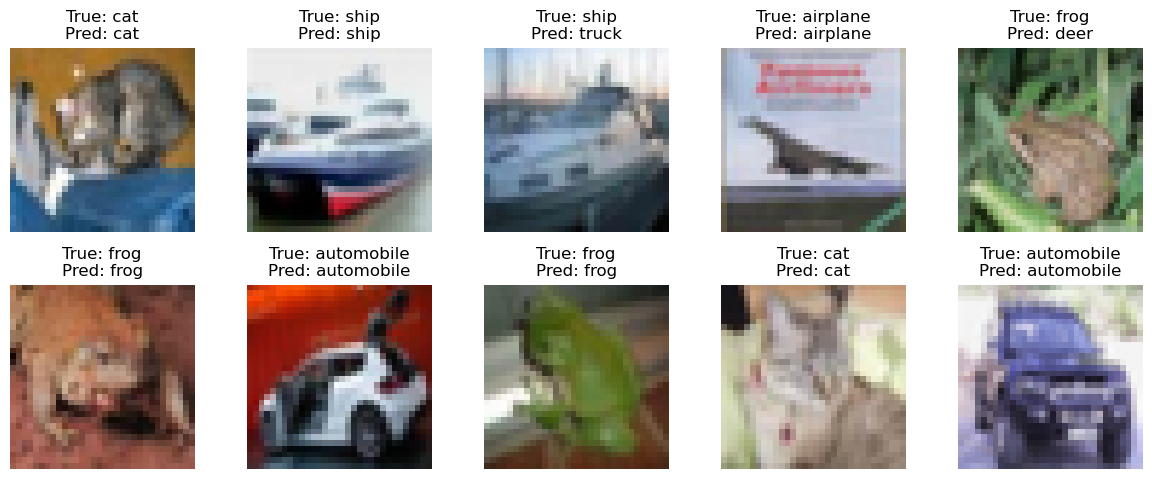

In [34]:
import matplotlib.pyplot as plt

# Plot the first 10 test images and visualise the output
plt.figure(figsize=(12, 12))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"True: {true_class_names[i]}\nPred: {predicted_class_names[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
